In [29]:
import numpy as np 
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [30]:
dataset=pd.read_csv("/Users/Liuxinran/Desktop/mushrooms.csv")
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


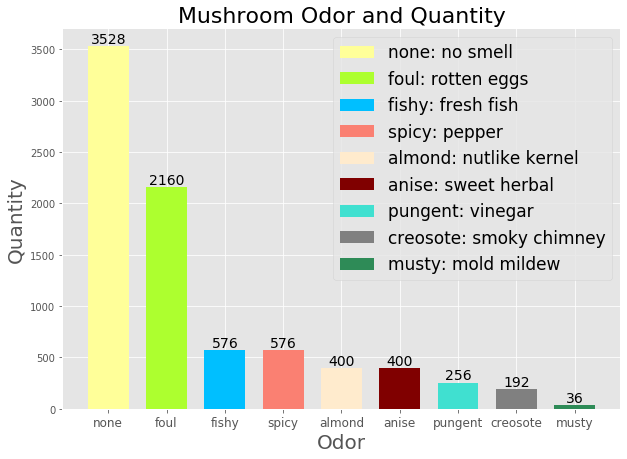

In [31]:
odors = dataset['odor'].value_counts()
odor_height = odors.values.tolist() #Provides numerical values
odor_labels = odors.axes[0].tolist() #Converts index labels object to list

#=====PLOT Preparations and Plotting====#
width = 0.7 
ind = np.arange(9)  # the x locations for the groups
colors = ['#FFFF99','#ADFF2F','#00BFFF','#FA8072','#FFEBCD','#800000','#40E0D0','#808080','#2E8B57']

fig, ax = plt.subplots(figsize=(10,7))
odor_bars = ax.bar(ind, odor_height , width, color=colors)

#Add some text for labels, title and axes ticks
ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Odor and Quantity',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)
ax.legend(odor_bars, ['none: no smell','foul: rotten eggs', 'fishy: fresh fish','spicy: pepper',
                      'almond: nutlike kernel', 'anise: sweet herbal', 'pungent: vinegar',
                     'creosote: smoky chimney', 'musty: mold mildew'],fontsize=17)
autolabel(odor_bars)        
plt.show()

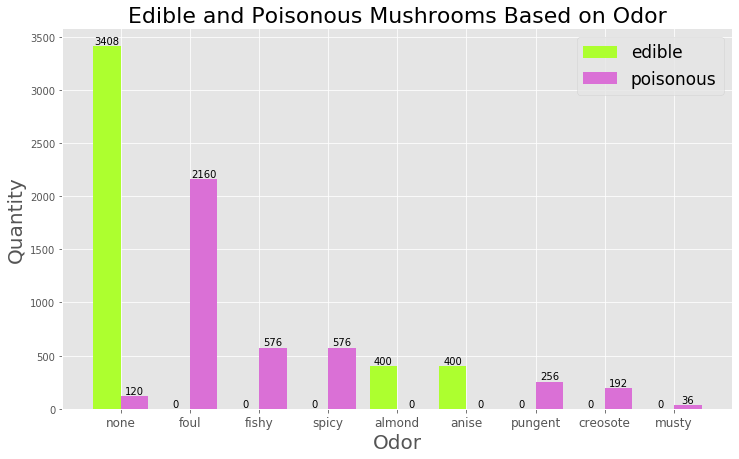

In [32]:
poisonous_od = [] #Poisonous odor list
edible_od = []    #Edible odor list
for odor in odor_labels:
    size = len(dataset[dataset['odor'] == odor].index)
    edibles = len(dataset[(dataset['odor'] == odor) & (dataset['class'] == 'e')].index)
    edible_od.append(edibles)
    poisonous_od.append(size-edibles)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_od , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_od , width, color='#DA70D6')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Odor',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()

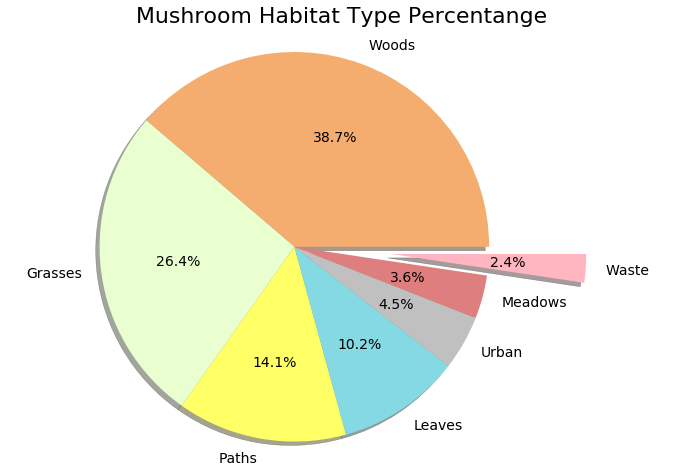

In [33]:
#Get the habitat types and its values for a Single Pie chart
habitats = dataset['habitat'].value_counts()
hab_size = habitats.values.tolist() #Provides numerical values
hab_types = habitats.axes[0].tolist() #Converts index labels object to list
# Data to plot
hab_labels = 'Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'
colors = ['#F5AD6F','#EAFFD0','#FFFF66','#84D9E2','#C0C0C0','#DE7E7E', '#FFB6C1']
explode = (0, 0, 0, 0, 0, 0,0.5)  # explode 1st slice
fig = plt.figure(figsize=(12,8))
# Plot
plt.title('Mushroom Habitat Type Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(hab_size, explode=explode, labels=hab_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=360)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

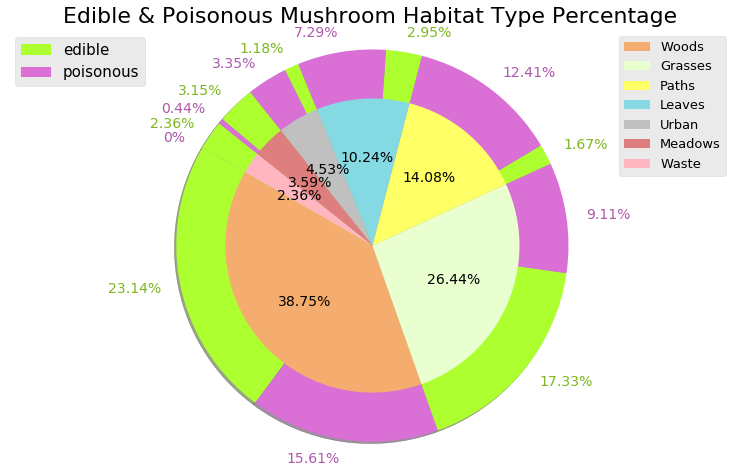

In [34]:
poisonous_hab = [] #Poisonous habitat type list
edible_hab = []    #Edible habitat type list
for hab in hab_types: 
    size = len(dataset[dataset['habitat'] == hab].index)
    edibles = len(dataset[(dataset['habitat'] == hab) & (dataset['class'] == 'e')].index)
    edible_hab.append(edibles) #Gets edibles
    poisonous_hab.append(size-edibles) #Gets poisonous
combine_ed_poi = []
for i in range(0,len(edible_hab)): #Combines both edible and poisonous in a single list. 
    combine_ed_poi.append(edible_hab[i])
    combine_ed_poi.append(poisonous_hab[i])
#Preparations for DOUBLE pie chart.
fig = plt.subplots(figsize=(13,8))
plt.title('Edible & Poisonous Mushroom Habitat Type Percentage', fontsize=22)
percentages_e_p = ['23.14%','15.61%','17.33%', '9.11%','1.67%','12.41%','2.95%','7.29%','1.18%','3.35%',
                  '3.15%','0.44%','2.36%','0%'] #Percetanges for edible and poisonous
#===First pie===
patches1, texts1= plt.pie(combine_ed_poi,radius = 2, labels=percentages_e_p,
                                colors=['#ADFF2F','#DA70D6'], shadow=True, startangle=150)
for i in range(0,len(texts1)):
    if(i%2==0):
        texts1[i].set_color('#7CB721') #Color % labels with dark green
    else:
        texts1[i].set_color('#AE59AB') # " " dark purple
    texts1[i].set_fontsize(14)         #make labels bigger
#===Second pie===
patches2, texts2, autotexts2 = plt.pie(hab_size, colors=colors, radius = 1.5,
        autopct='%1.2f%%', shadow=True, startangle=150,labeldistance= 2.2)
for aut in autotexts2:
    aut.set_fontsize(14)  #Inner autotext fontsize
    aut.set_horizontalalignment('center') #Center
#==Set 2 Legends to the plot.
first_legend   = plt.legend(patches1, ['edible','poisonous'], loc="upper left", fontsize=15)
second_ledgend = plt.legend(patches2, hab_labels, loc="best",fontsize=13)
plt.gca().add_artist(first_legend) #To display two legends
#Align both pie charts in the same position
plt.axis('equal')
plt.show()

In [35]:
labelencoder=LabelEncoder()
for column in dataset.columns:
    dataset[column] = labelencoder.fit_transform(dataset[column])

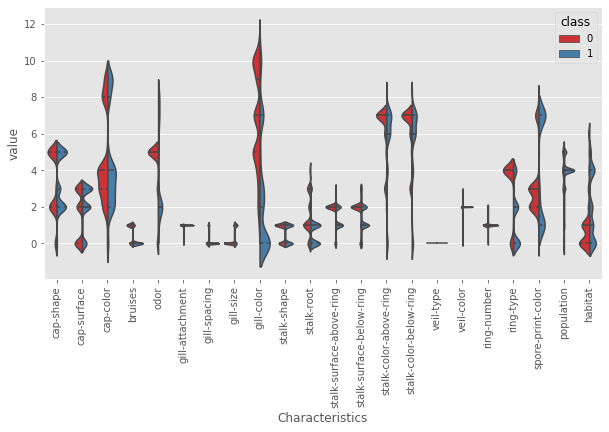

In [36]:
dataset_div = pd.melt(dataset, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(10,5))
poison = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=dataset_div, inner = 'quartile', palette = 'Set1')
dataset_no_class = dataset.drop(["class"],axis = 1)
poison.set_xticklabels(rotation = 90, labels = list(dataset_no_class.columns));

In [37]:
X=dataset.drop(['class'], axis=1)
Y=dataset['class']

In [38]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3)

In [39]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

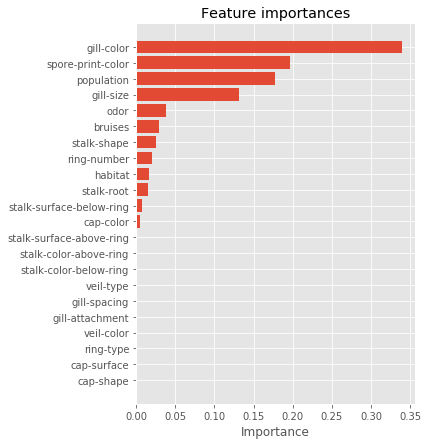

In [40]:
features_list = X.columns.values
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(5,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()

In [41]:
# Checking for nulls
dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [42]:
# Describe Dataset
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [43]:
# Class column is response and rest columns are predictors.
# Seprating Predictors and Response
X=dataset.drop('class',axis=1) #Predictors
y=dataset['class'] #Response
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [44]:
# Encoding categorical data
# Label encoding
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [45]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [46]:
# Getting dummy variables
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [47]:
# Splitting the dataset into the Training set and Test set 70% and 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [50]:
def visualization_train(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('coral', 'powderblue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('coral', 'blue'))(i), label = j)
    plt.title("%s Training Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
def visualization_test(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('coral', 'powderblue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('coral', 'blue'))(i), label = j)
    plt.title("%s Test Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()

In [51]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [52]:
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

In [72]:
########## Logistic Regression

In [53]:
import math
def Sigmoid(x):
	g = float(1.0 / float((1.0 + math.exp(-1.0*x))))
	return g
def Prediction(theta, x):
	z = 0
	for i in range(len(theta)):
		z += x[i]*theta[i]
	return Sigmoid(z)
def Cost_Function(X,Y,theta,m):
	sumOfErrors = 0
	for i in range(m):
		xi = X[i]
		est_yi = Prediction(theta,xi)
		if Y[i] == 1:
			error = Y[i] * math.log(est_yi)
		elif Y[i] == 0:
			error = (1-Y[i]) * math.log(1-est_yi)
		sumOfErrors += error
	const = -1/m
	J = const * sumOfErrors
	#print 'cost is ', J 
	return J
def Cost_Function_Derivative(X,Y,theta,j,m,alpha):
	sumErrors = 0
	for i in range(m):
		xi = X[i]
		xij = xi[j]
		hi = Prediction(theta,X[i])
		error = (hi - Y[i])*xij
		sumErrors += error
	m = len(Y)
	constant = float(alpha)/float(m)
	J = constant * sumErrors
	return J
def Gradient_Descent(X,Y,theta,m,alpha):
	new_theta = []
	constant = alpha/m
	for j in range(len(theta)):
		deltaF = Cost_Function_Derivative(X,Y,theta,j,m,alpha)
		new_theta_value = theta[j] - deltaF
		new_theta.append(new_theta_value)
	return new_theta

In [54]:
theta = [0,0] 
alpha = 0.1 
max_iteration = 10
m = len(X_train) 
for x in range(max_iteration):
    new_theta = Gradient_Descent(X_train,y_train,theta,m,alpha)
    theta = new_theta
    if x % 200 == 0:
        Cost_Function(X_train,y_train,theta,m)
print ('theta ', theta)
print ('cost is ', Cost_Function(X_train,y_train,theta,m))
score=0
length = len(X_train)
for i in range(length):
    predict = round(Prediction(X_train[i],theta))
    answer = y_train[i]
    if predict == answer:
        score += 1
my_score = float(score) / float(length)
my_score

theta  [0.5155632637648199, 0.10161129519517934]
cost is  0.3820051235952864


0.8914878649314105

In [55]:
score=0
length = len(X_test)
for i in range(length):
    predict = round(Prediction(X_test[i],theta))
    answer = y_test[i]
    if predict == answer:
        score += 1
my_score = float(score) / float(length)
my_score

0.8880229696472518

In [56]:
theta = [0,0] 
alpha = 0.1 
max_iteration = 100
m = len(X_train) 
for x in range(max_iteration):
    new_theta = Gradient_Descent(X_train,y_train,theta,m,alpha)
    theta = new_theta
    if x % 200 == 0:
        Cost_Function(X_train,y_train,theta,m)
print ('theta ', theta)
print ('cost is ', Cost_Function(X_train,y_train,theta,m))
score=0
length = len(X_train)
for i in range(length):
    predict = round(Prediction(X_train[i],theta))
    answer = y_train[i]
    if predict == answer:
        score += 1
my_score = float(score) / float(length)
my_score

theta  [0.9086860218028485, 0.12704506671596785]
cost is  0.3426753825413783


0.8918396060499473

In [57]:
score=0
length = len(X_test)
for i in range(length):
    predict = round(Prediction(X_test[i],theta))
    answer = y_test[i]
    if predict == answer:
        score += 1
my_score = float(score) / float(length)
my_score

0.8867924528301887

In [58]:
theta = [0,0] 
alpha = 0.1 
max_iteration = 500
m = len(X_train) 
for x in range(max_iteration):
    new_theta = Gradient_Descent(X_train,y_train,theta,m,alpha)
    theta = new_theta
    if x % 200 == 0:
        Cost_Function(X_train,y_train,theta,m)
print ('theta ', theta)
print ('cost is ', Cost_Function(X_train,y_train,theta,m))
score=0
length = len(X_train)
for i in range(length):
    predict = round(Prediction(X_train[i],theta))
    answer = y_train[i]
    if predict == answer:
        score += 1
my_score = float(score) / float(length)
my_score

theta  [0.9205946329574499, 0.12617670772269868]
cost is  0.34265114703266725


0.8918396060499473

In [59]:
score=0
length = len(X_test)
for i in range(length):
    predict = round(Prediction(X_test[i],theta))
    answer = y_test[i]
    if predict == answer:
        score += 1
my_score = float(score) / float(length)
my_score

0.8867924528301887

In [60]:
theta = [0,0] 
alpha = 5
max_iteration = 100
m = len(X_train) 
for x in range(max_iteration):
    new_theta = Gradient_Descent(X_train,y_train,theta,m,alpha)
    theta = new_theta
    if x % 200 == 0:
        Cost_Function(X_train,y_train,theta,m)
print ('theta ', theta)
print ('cost is ', Cost_Function(X_train,y_train,theta,m))
score=0
length = len(X_train)
for i in range(length):
    predict = round(Prediction(X_train[i],theta))
    answer = y_train[i]
    if predict == answer:
        score += 1
my_score = float(score) / float(length)
my_score

theta  [0.9913272265207667, -0.8166000046599902]
cost is  0.5334113206420714


0.789482940555751

In [61]:
score=0
length = len(X_test)
for i in range(length):
    predict = round(Prediction(X_test[i],theta))
    answer = y_test[i]
    if predict == answer:
        score += 1
my_score = float(score) / float(length)
my_score

0.7850697292863003

In [62]:
theta = [0,0] 
alpha = 0.01 
max_iteration = 100

m = len(X_train) 

for x in range(max_iteration):
	new_theta = Gradient_Descent(X_train,y_train,theta,m,alpha)
	theta = new_theta
	if x % 200 == 0:
		Cost_Function(X_train,y_train,theta,m)
print ('theta ', theta)
print ('cost is ', Cost_Function(X_train,y_train,theta,m))
score=0
length = len(X_train)
for i in range(length):
    prediction = round(Prediction(X_train[i],theta))
    answer = y_train[i]
    if prediction == answer:
        score += 1
	
my_score = float(score) / float(length)
my_score

theta  [0.498333951149969, 0.09854253438829139]
cost is  0.3861741864532584


0.8914878649314105

In [63]:
score=0
length = len(X_test)
for i in range(length):
    predict = round(Prediction(X_test[i],theta))
    answer = y_test[i]
    if predict == answer:
        score += 1
my_score = float(score) / float(length)
my_score

0.8880229696472518

In [64]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Training results:

Accuracy Score: 0.9057

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      2951
           1       0.96      0.84      0.90      2735

    accuracy                           0.91      5686
   macro avg       0.91      0.90      0.90      5686
weighted avg       0.91      0.91      0.91      5686


Confusion Matrix:
[[2849  102]
 [ 434 2301]]

Average Accuracy:	0.9057

Standard Deviation:	0.0097
Test results:

Accuracy Score: 0.9028

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1257
           1       0.96      0.83      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.90      0.90      2438
weighted avg       0.91      0.90      0.90      2438


Confusion Matrix:
[[1218   39]
 [ 198  983]]



In [66]:
classifier = LogisticRegression(C=0.01)
classifier.fit(X_train,y_train)

print_score(classifier,X_train,y_train,X_test,y_test,train=True)
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Training results:

Accuracy Score: 0.9026

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2951
           1       0.96      0.83      0.89      2735

    accuracy                           0.90      5686
   macro avg       0.91      0.90      0.90      5686
weighted avg       0.91      0.90      0.90      5686


Confusion Matrix:
[[2853   98]
 [ 456 2279]]

Average Accuracy:	0.9019

Standard Deviation:	0.0093
Test results:

Accuracy Score: 0.9011

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1257
           1       0.97      0.82      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.90      0.90      2438
weighted avg       0.91      0.90      0.90      2438


Confusion Matrix:
[[1223   34]
 [ 207  974]]



In [67]:
classifier = LogisticRegression(C=1000)
classifier.fit(X_train,y_train)

print_score(classifier,X_train,y_train,X_test,y_test,train=True)
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Training results:

Accuracy Score: 0.9057

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      2951
           1       0.96      0.84      0.90      2735

    accuracy                           0.91      5686
   macro avg       0.91      0.90      0.90      5686
weighted avg       0.91      0.91      0.91      5686


Confusion Matrix:
[[2849  102]
 [ 434 2301]]

Average Accuracy:	0.9057

Standard Deviation:	0.0097
Test results:

Accuracy Score: 0.9028

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1257
           1       0.96      0.83      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.90      0.90      2438
weighted avg       0.91      0.90      0.90      2438


Confusion Matrix:
[[1218   39]
 [ 198  983]]



In [68]:
classifier = LogisticRegression(penalty='l1')
classifier.fit(X_train,y_train)

print_score(classifier,X_train,y_train,X_test,y_test,train=True)
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Training results:

Accuracy Score: 0.9054

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      2951
           1       0.96      0.84      0.90      2735

    accuracy                           0.91      5686
   macro avg       0.91      0.90      0.90      5686
weighted avg       0.91      0.91      0.90      5686


Confusion Matrix:
[[2849  102]
 [ 436 2299]]

Average Accuracy:	0.9057

Standard Deviation:	0.0097
Test results:

Accuracy Score: 0.9024

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1257
           1       0.96      0.83      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.90      0.90      2438
weighted avg       0.91      0.90      0.90      2438


Confusion Matrix:
[[1218   39]
 [ 199  982]]



Text(0.5, 15.0, 'Predicted label')

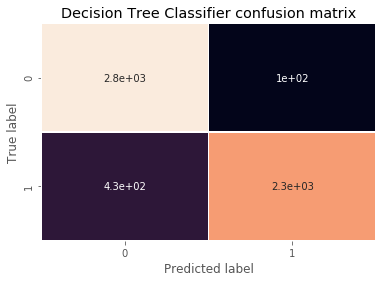

In [69]:
##Optimal choice
classifier = LogisticRegression(C=1.0, max_iter=100, penalty='l2')
classifier.fit(X_train,y_train)
cfm=confusion_matrix(y_train, classifier.predict(X_train))
sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


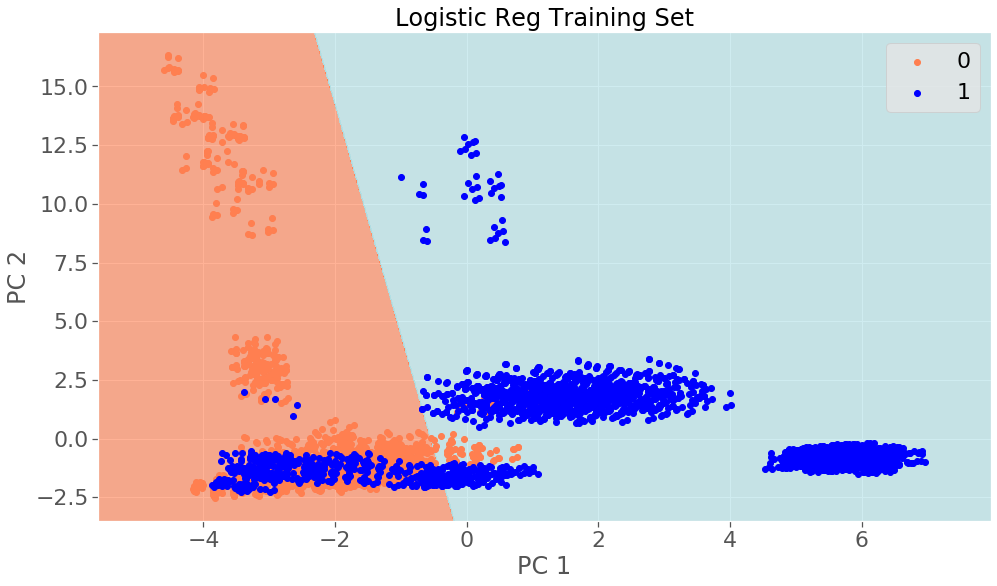

In [70]:
visualization_train('Logistic Reg')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


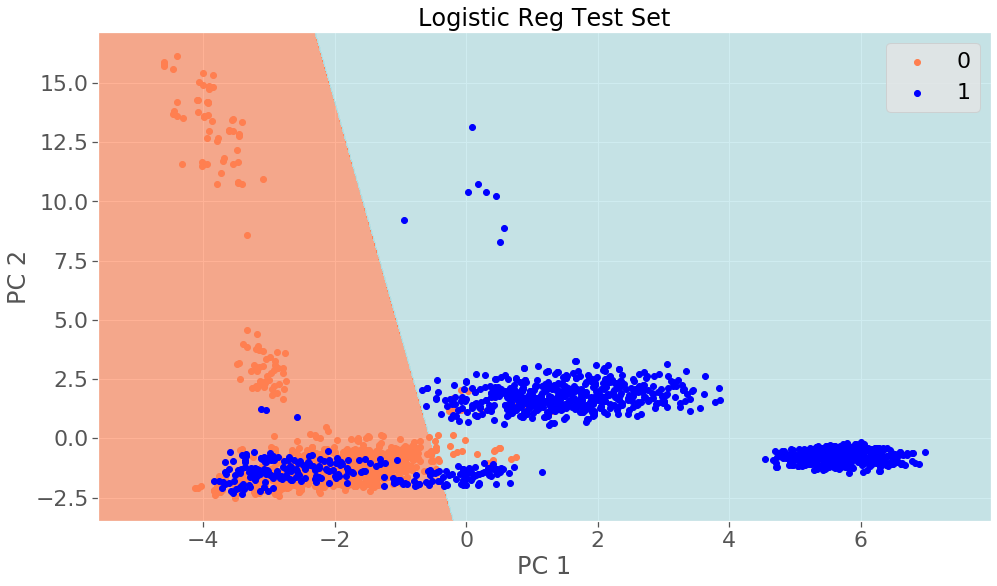

In [71]:
visualization_test('Logistic Reg')

In [73]:
##### K-Nearest Neighbor

In [149]:
dataset=pd.read_csv("/Users/Liuxinran/Desktop/mushrooms.csv")

In [151]:
X=dataset.drop('class',axis=1) #Predictors
y=dataset['class'] #Response

In [152]:
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [153]:
X=pd.get_dummies(X,columns=X.columns,drop_first=True)

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [155]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [156]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [157]:
from sklearn.neighbors import KNeighborsClassifier as KNN

classifier_2 = KNN(n_neighbors=2)
classifier_2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [158]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

In [159]:
print_score(classifier_2,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9493

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2951
           1       1.00      0.89      0.94      2735

    accuracy                           0.95      5686
   macro avg       0.96      0.95      0.95      5686
weighted avg       0.95      0.95      0.95      5686


Confusion Matrix:
[[2951    0]
 [ 288 2447]]

Average Accuracy:	0.9187

Standard Deviation:	0.0112


In [160]:
print_score(classifier_2,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9163

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1257
           1       0.97      0.85      0.91      1181

    accuracy                           0.92      2438
   macro avg       0.92      0.91      0.92      2438
weighted avg       0.92      0.92      0.92      2438


Confusion Matrix:
[[1231   26]
 [ 178 1003]]



In [161]:
classifier_20 = KNN(n_neighbors=20)
classifier_20.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [162]:
print_score(classifier_20,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9379

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2951
           1       0.97      0.90      0.93      2735

    accuracy                           0.94      5686
   macro avg       0.94      0.94      0.94      5686
weighted avg       0.94      0.94      0.94      5686


Confusion Matrix:
[[2871   80]
 [ 273 2462]]

Average Accuracy:	0.9358

Standard Deviation:	0.0084


In [163]:
print_score(classifier_20,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9311

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1257
           1       0.97      0.89      0.93      1181

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438


Confusion Matrix:
[[1222   35]
 [ 133 1048]]



In [164]:
classifier_10 = KNN(n_neighbors=10)
classifier_10.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [165]:
print_score(classifier_10,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9393

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2951
           1       0.97      0.90      0.93      2735

    accuracy                           0.94      5686
   macro avg       0.94      0.94      0.94      5686
weighted avg       0.94      0.94      0.94      5686


Confusion Matrix:
[[2877   74]
 [ 271 2464]]

Average Accuracy:	0.9342

Standard Deviation:	0.0101


In [166]:
print_score(classifier_10,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9319

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1257
           1       0.97      0.89      0.93      1181

    accuracy                           0.93      2438
   macro avg       0.94      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438


Confusion Matrix:
[[1222   35]
 [ 131 1050]]



In [167]:
def visualization_train(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier_10.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('coral', 'powderblue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('coral', 'blue'))(i), label = j)
    plt.title("%s Training Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
def visualization_test(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier_10.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('coral', 'powderblue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('coral', 'blue'))(i), label = j)
    plt.title("%s Test Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


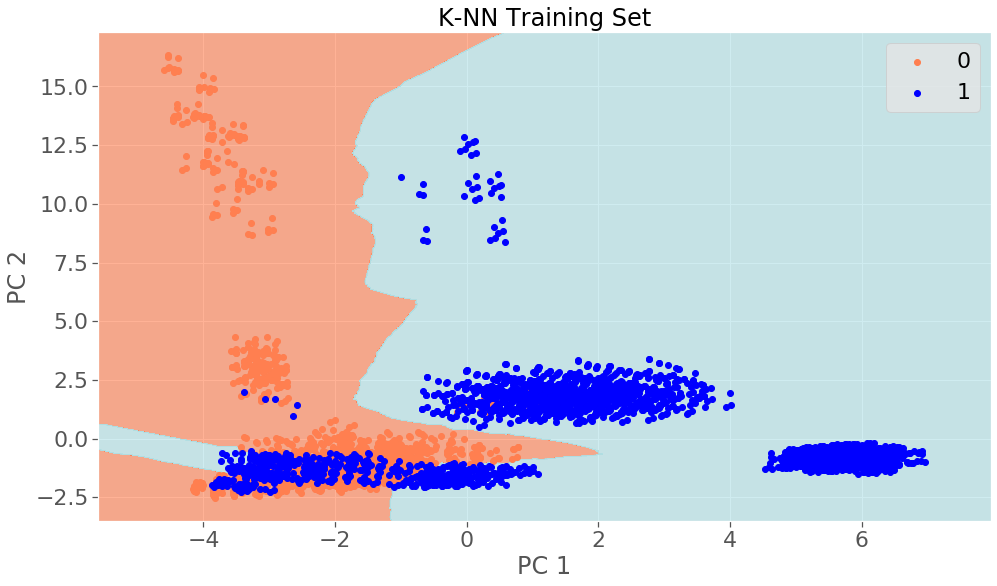

In [168]:
visualization_train('K-NN')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


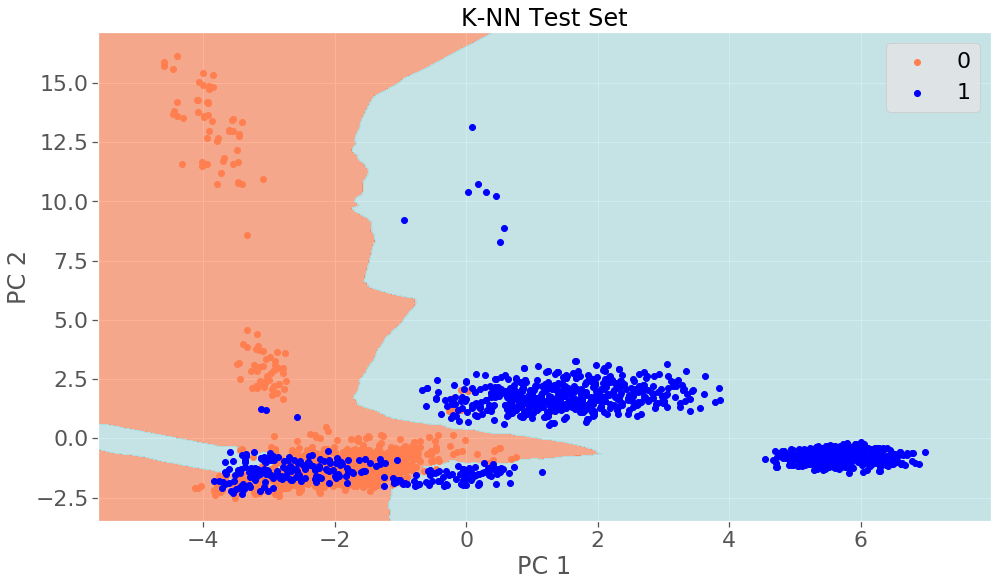

In [169]:
visualization_test('K-NN')

In [170]:
##### SVM

In [191]:
dataset=pd.read_csv("/Users/Liuxinran/Desktop/mushrooms.csv")

In [192]:
labelencoder=LabelEncoder()
for column in dataset.columns:
    dataset[column] = labelencoder.fit_transform(dataset[column])

In [193]:
# Class column is response and rest columns are predictors.
# Seprating Predictors and Response
X=dataset.drop('class',axis=1) #Predictors
y=dataset['class'] #Response

In [194]:
# Encoding categorical data
# Label encoding
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [195]:
X=pd.get_dummies(X,columns=X.columns,drop_first=True)

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [197]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [198]:
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [199]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [205]:
def visualization_train(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('coral', 'powderblue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('coral', 'blue'))(i), label = j)
    plt.title("%s Training Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
def visualization_test(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('coral', 'powderblue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('coral', 'blue'))(i), label = j)
    plt.title("%s Test Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()

In [206]:
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

In [207]:
# Support Vecor (SVC) Classification Model
# Linear
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=42, C = 1)
classifier.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [208]:
# SVC Training Results
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.8991

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2951
           1       0.96      0.82      0.89      2735

    accuracy                           0.90      5686
   macro avg       0.91      0.90      0.90      5686
weighted avg       0.91      0.90      0.90      5686


Confusion Matrix:
[[2860   91]
 [ 483 2252]]

Average Accuracy:	0.8992

Standard Deviation:	0.0097


In [209]:
# SVC Test Results
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.8999

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1257
           1       0.97      0.82      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.90      0.90      2438
weighted avg       0.91      0.90      0.90      2438


Confusion Matrix:
[[1224   33]
 [ 211  970]]



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


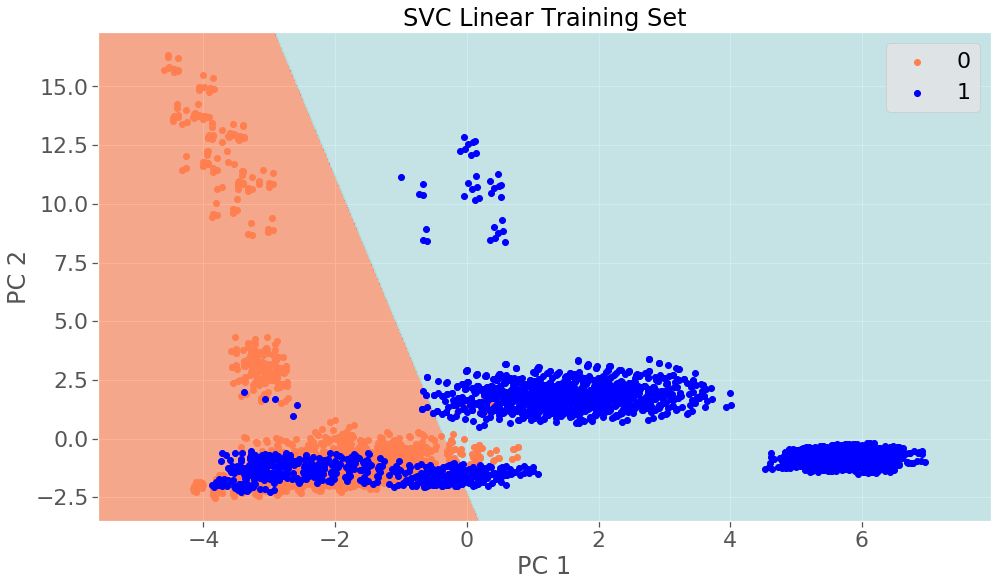

In [210]:
visualization_train(model = 'SVC Linear')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


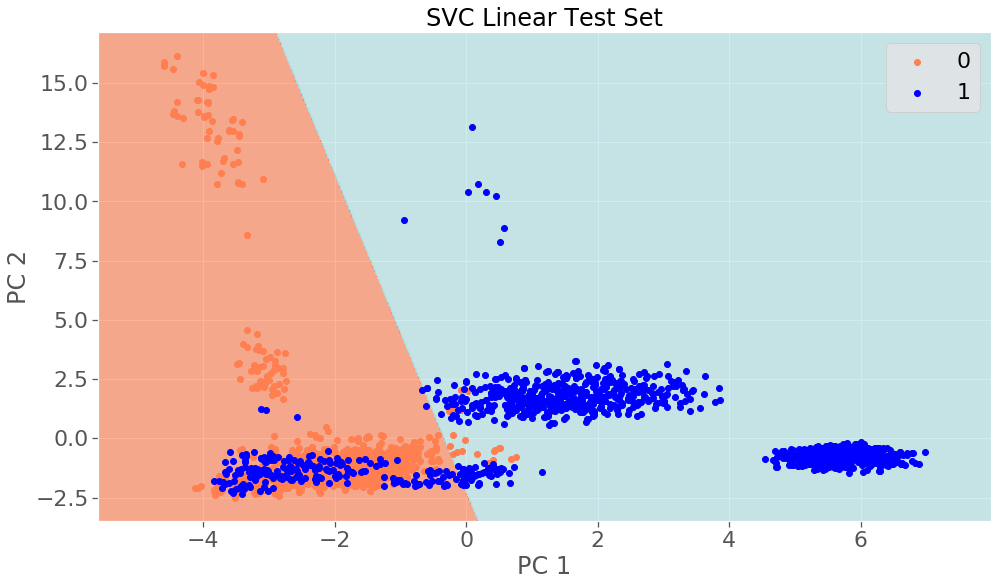

In [211]:
# Visualising the SVC Test set results
visualization_test(model = 'SVC Linear')

In [221]:
# Support Vecor (SVC) Classification Model
# Polynomial
classifier = SVC(kernel='poly',random_state=42, C = 1)
classifier.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [222]:
# SVC Training Results
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.8783

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.99      0.89      2951
           1       0.98      0.76      0.86      2735

    accuracy                           0.88      5686
   macro avg       0.90      0.87      0.88      5686
weighted avg       0.90      0.88      0.88      5686


Confusion Matrix:
[[2913   38]
 [ 654 2081]]

Average Accuracy:	0.8788

Standard Deviation:	0.0133


In [223]:
# SVC Test Results
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.8679

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      1257
           1       0.99      0.74      0.84      1181

    accuracy                           0.87      2438
   macro avg       0.89      0.86      0.86      2438
weighted avg       0.89      0.87      0.87      2438


Confusion Matrix:
[[1244   13]
 [ 309  872]]



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


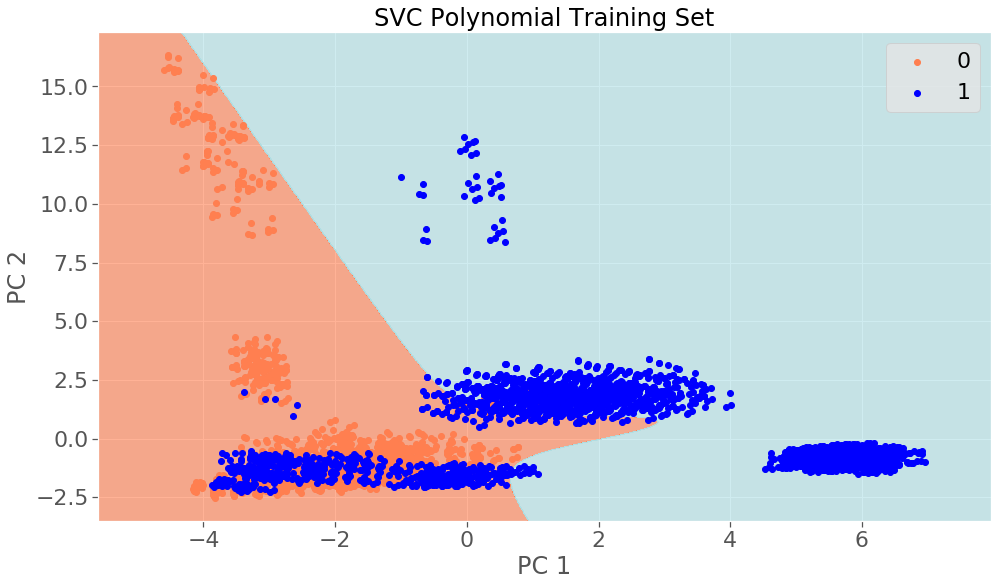

In [224]:
visualization_train(model = 'SVC Polynomial')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


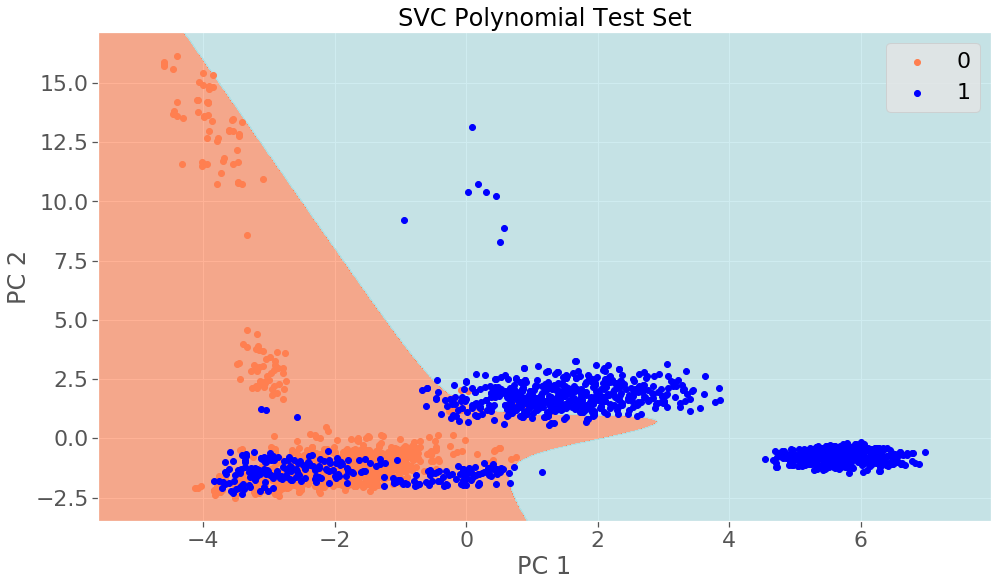

In [225]:
visualization_test(model = 'SVC Polynomial')

In [226]:
# Support Vecor (SVC) Classification Model
# RBF
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=42, C = 1)

classifier.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [227]:
# SVC Training Results
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9289

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.93      2951
           1       0.97      0.88      0.92      2735

    accuracy                           0.93      5686
   macro avg       0.93      0.93      0.93      5686
weighted avg       0.93      0.93      0.93      5686


Confusion Matrix:
[[2884   67]
 [ 337 2398]]

Average Accuracy:	0.9281

Standard Deviation:	0.0112


In [228]:
# SVC Test Results
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9258

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1257
           1       0.98      0.87      0.92      1181

    accuracy                           0.93      2438
   macro avg       0.93      0.92      0.93      2438
weighted avg       0.93      0.93      0.93      2438


Confusion Matrix:
[[1232   25]
 [ 156 1025]]



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


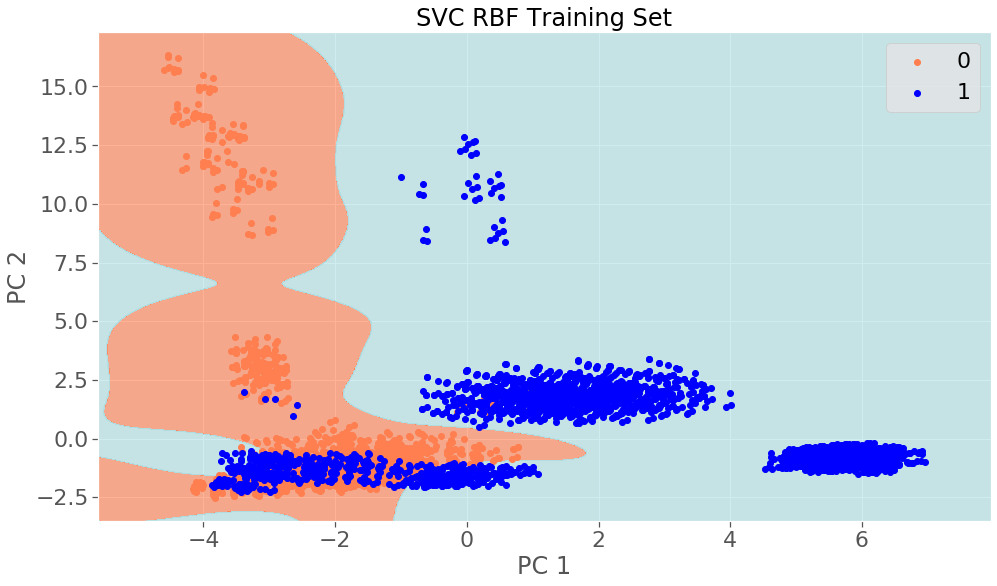

In [229]:
visualization_train(model = 'SVC RBF')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


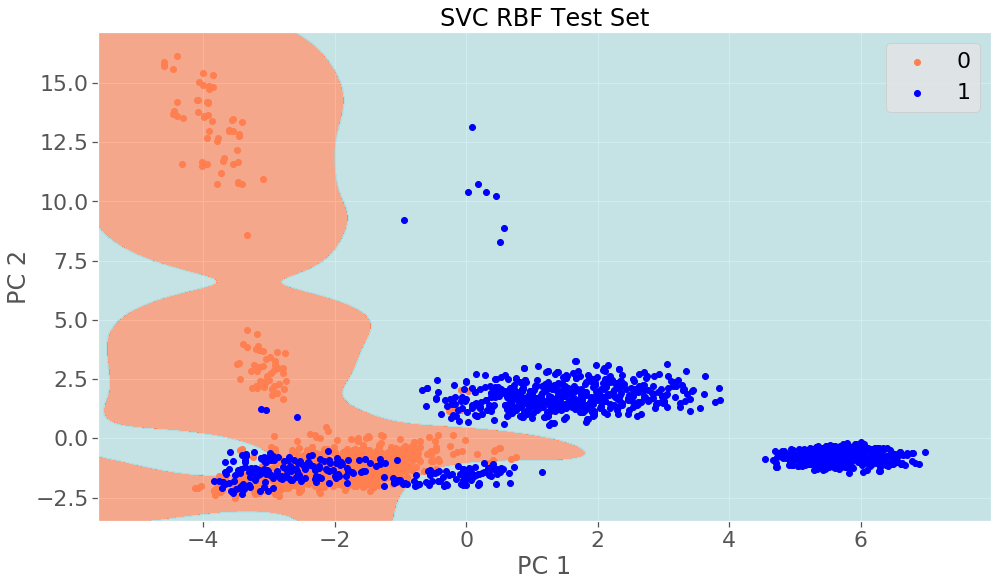

In [230]:
# Visualising the SVC Test set results
visualization_test(model = 'SVC RBF')

In [231]:
# Splitting the dataset into the Training set and Test set 90% and 10%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [232]:
# Feature Scaling
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [233]:
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [234]:
# Support Vecor (SVC) Classification Model
# Linear with 90% training and 10% testing
classifier = SVC(kernel='linear',random_state=42, C = 1)
classifier.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [235]:
# SVC Training Results
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9010

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      3775
           1       0.97      0.82      0.89      3536

    accuracy                           0.90      7311
   macro avg       0.91      0.90      0.90      7311
weighted avg       0.91      0.90      0.90      7311


Confusion Matrix:
[[3670  105]
 [ 619 2917]]

Average Accuracy:	0.9010

Standard Deviation:	0.0067


In [236]:
# SVC Test Results
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.8954

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       433
           1       0.96      0.81      0.88       380

    accuracy                           0.90       813
   macro avg       0.91      0.89      0.89       813
weighted avg       0.90      0.90      0.89       813


Confusion Matrix:
[[420  13]
 [ 72 308]]



In [237]:
# Support Vecor (SVC) Classification Model
# Polynomial with 90% training and 10% testing
classifier = SVC(kernel='poly',random_state=42, C = 1)
classifier.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [238]:
# SVC Training Results
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.8710

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      3775
           1       0.99      0.74      0.85      3536

    accuracy                           0.87      7311
   macro avg       0.90      0.87      0.87      7311
weighted avg       0.89      0.87      0.87      7311


Confusion Matrix:
[[3738   37]
 [ 906 2630]]

Average Accuracy:	0.8707

Standard Deviation:	0.0074


In [239]:
# SVC Test Results
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.8561

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       433
           1       0.98      0.71      0.82       380

    accuracy                           0.86       813
   macro avg       0.89      0.85      0.85       813
weighted avg       0.88      0.86      0.85       813


Confusion Matrix:
[[427   6]
 [111 269]]



In [240]:
# Support Vecor (SVC) Classification Model
# RBF with 90% training and 10% testing
classifier = SVC(kernel='rbf',random_state=42, C = 1)

classifier.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [241]:
# SVC Training Results
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9297

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.93      3775
           1       0.97      0.88      0.92      3536

    accuracy                           0.93      7311
   macro avg       0.93      0.93      0.93      7311
weighted avg       0.93      0.93      0.93      7311


Confusion Matrix:
[[3689   86]
 [ 428 3108]]

Average Accuracy:	0.9293

Standard Deviation:	0.0064


In [242]:
# SVC Test Results
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9225

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       433
           1       0.96      0.87      0.91       380

    accuracy                           0.92       813
   macro avg       0.93      0.92      0.92       813
weighted avg       0.93      0.92      0.92       813


Confusion Matrix:
[[421  12]
 [ 51 329]]

